In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [4]:
# 2. Load dataset
df = pd.read_csv("Iris.csv")
df.drop(columns=["Id"], inplace=True)  # Remove unnecessary column
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
# 3. Feature and target separation
X = df.drop("Species", axis=1)
y = df["Species"]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 5. Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# 6. Try different values of K and store results
k_values = range(1, 11)
accuracies = []

In [9]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} - Accuracy: {acc:.2f}")

K=1 - Accuracy: 0.97
K=2 - Accuracy: 1.00
K=3 - Accuracy: 1.00
K=4 - Accuracy: 1.00
K=5 - Accuracy: 1.00
K=6 - Accuracy: 1.00
K=7 - Accuracy: 1.00
K=8 - Accuracy: 1.00
K=9 - Accuracy: 1.00
K=10 - Accuracy: 1.00


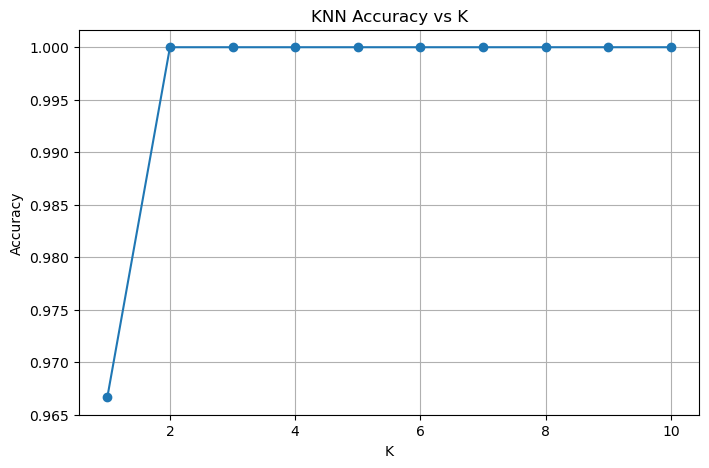

In [10]:
# 7. Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [11]:
# 8. Best K based on accuracy
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest K = {best_k} with Accuracy = {max(accuracies):.2f}")


Best K = 2 with Accuracy = 1.00


In [12]:
# 9. Confusion matrix for best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

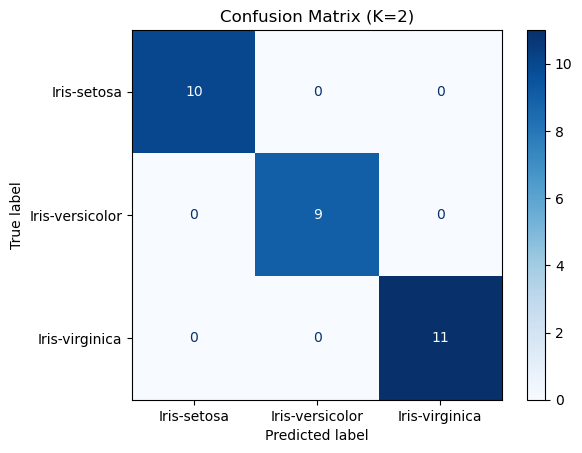

In [13]:
cm = confusion_matrix(y_test, y_pred_best, labels=best_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()

In [14]:
# 10. Visualize decision boundaries using PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Train with best_k on PCA-reduced data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train_pca)


KNeighborsClassifier(n_neighbors=2)

In [16]:
# Create meshgrid
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



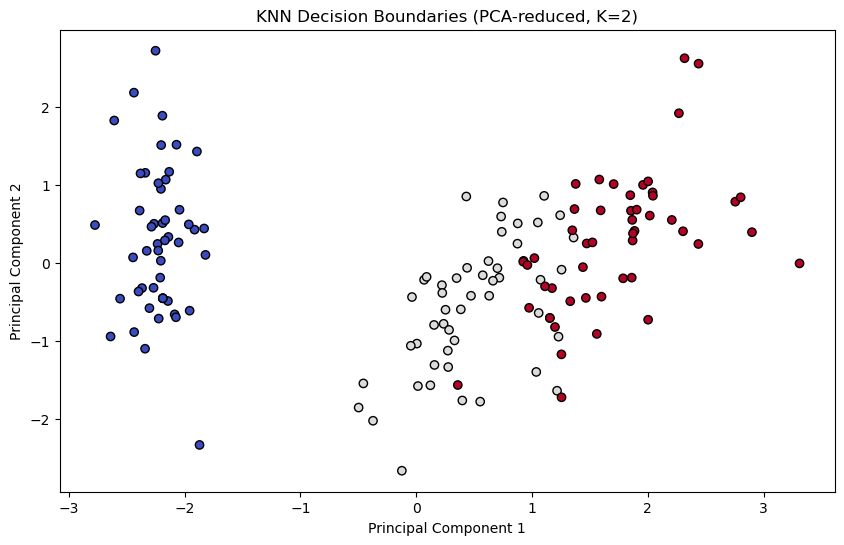

In [19]:
# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], edgecolor='k', cmap='coolwarm')
plt.title(f"KNN Decision Boundaries (PCA-reduced, K={best_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()